In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
btc_4h = pd.read_csv ('./datasets_bot/btc_4h.csv', encoding='unicode_escape')

In [10]:
#Cleaning the time column
def cleaning_time(btc_4h):
    btc_4h['time'] = btc_4h['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
    btc_4h['time'] = pd.to_datetime(btc_4h["time"])
    btc_4h.set_index("time", inplace = True)
    return btc_4h

In [11]:
cleaning_time(btc_4h)
btc_4h.head()

,close,Volume,VWAP,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI
time,,,,,,,,,,,,,,
2020-04-10 22:00:00,6857.0,1843.315,6916.632062,6973.904878,7082.726685,7061.071228,6966.353937,6718.480000,7235.224771,6930.228599,7540.220943,6625.232427,13.885015,38.622375
2020-04-11 02:00:00,6904.0,1790.871,6884.833333,6958.370461,7066.478805,7052.095729,6964.127011,6722.153663,7213.834171,6919.123439,7508.544902,6624.412708,22.817703,41.439408
2020-04-11 06:00:00,6873.5,1406.437,6886.666173,6939.510358,7048.935277,7041.890259,6960.890332,6725.150621,7191.658117,6906.212438,7477.103796,6620.766759,23.911433,40.151542
2020-04-11 10:00:00,6874.5,1121.264,6881.040818,6925.063612,7033.077525,7032.325101,6957.804963,6728.108034,7169.855876,6896.299174,7443.412578,6622.742472,26.556692,40.217144
2020-04-11 14:00:00,6829.5,1253.345,6871.509192,6903.827254,7014.570477,7020.735096,6953.222643,6730.115796,7147.328946,6881.812008,7412.845883,6616.295071,25.536294,38.188546


In [12]:
#Taking a sample
btc_4h = btc_4h[4000:]
len(btc_4h)

1759

In [13]:
#Short Trading Strategy
#Sell when Close > Upper ATR 3 and Volume > Volume.mean
#Buy when Close < Lower ATR 1
def sell_short(btc_4h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_4h)):
    if (btc_4h ['close'][i] >= btc_4h ["Upper ATR 3"][i] and btc_4h ['Volume'][i] > btc_4h["Volume"].mean()):
      if flag != 1:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_4h['close'][i])
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_4h ['close'][i] <= btc_4h ["Lower ATR 1"][i]):
      if flag != 0:
        sigPriceBuy.append(btc_4h["close"][i])
        sigPriceSell.append(np.nan)
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceSell, sigPriceBuy)

In [14]:
sell_short = sell_short(btc_4h)
btc_4h['Sell Signal'] = sell_short[0]
btc_4h['Buy Signal'] = sell_short[1]
# To show the data
btc_4h.head()

,close,Volume,VWAP,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Sell Signal,Buy Signal
time,,,,,,,,,,,,,,,,
2022-02-06 13:00:00,41485.0,16494.384,41575.28966,41309.32664,40257.56470,39579.85817,39038.45360,39027.14784,40981.94859,39533.18080,42430.71637,38084.41302,78.362804,70.968012,NaN,NaN
2022-02-06 17:00:00,41676.0,4392.798,41578.16150,41390.80961,40386.51336,39699.63771,39132.65169,39079.60036,41079.79840,39693.22832,42466.36849,38306.65823,66.932997,72.365130,NaN,NaN
2022-02-06 21:00:00,42350.0,9567.414,41714.84100,41603.96303,40565.01215,39851.08698,39247.55698,39144.36075,41292.24111,39837.78318,42746.69905,38383.32524,73.018174,76.637651,NaN,NaN
2022-02-07 01:00:00,42783.0,14819.863,42426.00000,41865.97125,40766.64740,40018.62487,39373.82281,39216.41301,41535.14573,39998.14908,43072.14239,38461.15242,81.642038,78.895122,NaN,NaN
2022-02-07 05:00:00,42727.5,7185.073,42532.77236,42057.42208,40944.90673,40173.41773,39493.59699,39285.93948,41690.54804,40199.26543,43181.83064,38707.98282,93.560881,77.856659,NaN,NaN


In [15]:
btc_4h.describe()

,close,Volume,VWAP,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Sell Signal,Buy Signal
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1.759000e+03,1759.000000,5.000000,6.000000
mean,28004.752700,26001.710461,28014.026154,28053.915051,28139.096764,28220.265226,28348.165782,28623.560325,28710.435011,27567.758518,29853.111505,26425.082024,4.946318e+01,47.978292,28235.600000,29927.333333
std,9615.994421,23744.979633,9606.726414,9603.457071,9572.527756,9535.021390,9473.581554,9366.304320,9745.892408,9403.415091,10104.496919,9078.890218,3.338694e+01,13.208602,11401.780998,11545.949609
min,15715.000000,84.430000,15842.795940,15902.844550,16187.020650,16336.451410,16574.724400,16987.946530,16487.726230,15866.889560,17047.023050,15220.722050,-1.660000e-14,9.817795,20254.500000,20143.500000
25%,19990.000000,11497.213000,19999.246365,19998.254575,20084.120525,20199.714825,20261.542390,20442.371405,20502.043235,19665.111790,21192.044850,18967.860330,1.644606e+01,39.362140,20611.000000,20610.000000
50%,23107.000000,19090.860000,23089.727340,23103.690920,23114.312920,23145.711320,23040.602240,23141.735760,23595.327190,22709.303780,24602.670510,21790.601820,4.924438e+01,47.244290,21788.000000,25468.500000
75%,38761.750000,32769.386000,38799.801205,38879.891330,39010.814545,39299.302005,39540.536735,39817.469325,39894.234780,38200.079555,41603.376615,36641.221225,8.111687e+01,56.255103,31731.500000,39294.000000
max,47915.000000,405624.985000,47550.237510,47383.177960,46867.567230,46285.188060,45905.019720,44990.392560,47483.422900,46272.153150,48795.540450,45081.324980,1.000000e+02,86.196918,46793.000000,45590.500000


In [18]:
#Short Strategy Visualization
def backtesting_short_strategy():
    plt.style.use('classic')
    plt.figure(figsize=(12,5))
    plt.plot(btc_4h['close'], label='BTC', alpha=0.35)
    plt.plot(btc_4h['Buy Signal'], label='', alpha=0.35)
    plt.plot(btc_4h['Sell Signal'],label='', alpha=0.35)
    plt.scatter(btc_4h.index, btc_4h['Buy Signal'], label ='Close Short', marker='^',color='red')
    plt.scatter(btc_4h.index, btc_4h['Sell Signal'],label='Open Short', marker='v', color='green')
    plt.title('BTC (4h) Buy and Sell Signals')
    plt.xlabel("Feb 06,2022 - Nov 25,2022")
    plt.ylabel("Adj Close Price USD($)")
    plt.legend(loc='lower left')
    plt.show()  

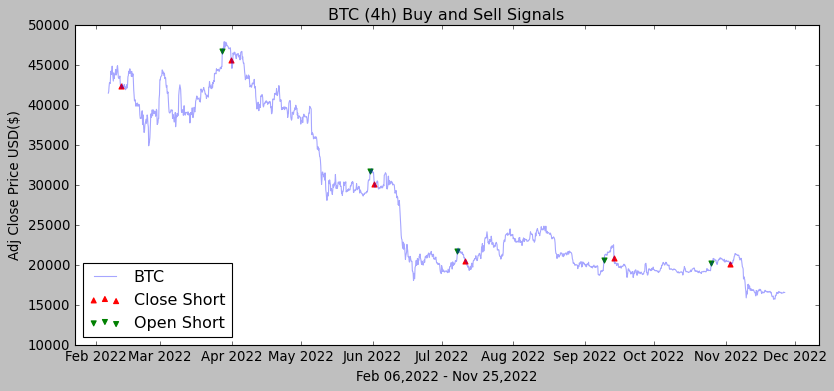

In [19]:
backtesting_short_strategy()